In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [50]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


test_labels = test_labels.reshape(-1,)
train_labels = train_labels.reshape(-1,)

# Class A :

## NetA

The first neural network will be the simplest, in that it has no hidden layers. It should take the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.
There should be no non-linearities for this network and is just a very simple linear classifier.


In [51]:
class NetA:
  def net(self,X,Y,tX,tY):
    perc=models.Sequential([
                            layers.Flatten(input_shape=(32,32,3)),
                            layers.Dense(10)
    ])
    perc.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])
    perc.summary()
    #ann.fit(X,Y, epochs=10)  
    history = perc.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = perc.evaluate(tX, tY)
    
    y_pred=perc.predict(tX)
    return y_pred,history,acc


# Class B :

## NetB
The second neural network will be slightly more complicated in that it has a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:
* Flatten the image to a vector for the input
* Use a fully-connected linear layer with 300 hidden-neurons
* Use the ReLU activation function
* Use a fully-connected linear layer to the 10 outputs.

In [52]:
class NetB:

  def net(self,X,Y,tX,tY):
    ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(300, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

    ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    ann.summary()
    #ann.fit(X,Y, epochs=10)  
    history = ann.fit(X, Y, epochs=50, 
                    validation_data=(tX, tY))  
    acc = ann.evaluate(tX, tY)
    y_pred= ann.predict(tX)
    return y_pred,history,acc

# Class C :
## NetC
This third neural network will be a convolutional neural network. It should use the following
operations in this order:
* Use a convolution layer with kernel-width 5 and depth 25
* Use the ReLU activation function
* Use a max-pool operation with kernel-width 2 and stride 2
* Flatten the image to a vector for the next step's input
* Use a fully-connected linear layer to the 10 outputs.


In [53]:
class NetC:

    def net(self,x,y,tx,ty):
      model = models.Sequential()
      model.add(layers.Conv2D(32 , (5,5), activation='relu', input_shape=(32,32,3),padding="same"))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Flatten())
      model.add(layers.Dense(512))
      model.add(layers.Dense(10,activation="softmax"))
      model.summary()

      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

      history = model.fit(x, y, epochs=50, batch_size=100, 
                    validation_data=(tx, ty)) 
      acc = model.evaluate(tx, ty) 
      y_pred= model.predict(tx)
      return y_pred,history,acc




# Class D :
## NetD
This fourth neural network will be a convolutional neural network. It should use the following
operations in this order:
* Use two convolution layer, one with kernel-width 5 and depth 32 and
  second one with kernel-width 4 and depth 64.
* Use the ReLU activation function
* Use two max-pool operation with kernel-width 2 and stride 2
* Use a dropout operation with rate 0.2
* Flatten the image to a vector for the next step's input
* Use a fully-connected linear layer to the 10 outputs.

In [54]:
class NetD:

    def net(self,x,y,tx,ty):
      model = models.Sequential()
      model.add(layers.Conv2D(32 , (5,5), activation='relu', input_shape=(32,32,3),padding="same"))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Conv2D(64 , (4,4), activation='relu'))
      model.add(layers.MaxPooling2D((2,2),strides=2))
      model.add(layers.Dropout(0.2))
      model.add(layers.Flatten())
      model.add(layers.Dense(512))
      model.add(layers.Dense(10,activation="softmax"))
      model.summary()

      model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.009),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

      history = model.fit(x, y, epochs=50, batch_size=100, 
                    validation_data=(tx, ty)) 
      acc = model.evaluate(tx, ty) 
      y_pred= model.predict(tx)
      return y_pred,history,acc

In [55]:
predA,hisA,aacA=NetA().net(train_images,train_labels,test_images,test_labels)   


predB,hisB,accB=NetB().net(train_images,train_labels,test_images,test_labels)

     
predC,hisC,accC=NetC().net(train_images,train_labels,test_images,test_labels)


predD,hisD,accD=NetD().net(train_images,train_labels,test_images,test_labels)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 9.6046 - accuracy: 0.1032 - val_loss: 9.8173 - val_accuracy: 0.1016
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 9.0304 - accuracy: 0.1015 - val_loss: 10.5722 - val_accuracy: 0.1071
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 8.8904 - accuracy: 0.1029 - val_loss: 9.1945 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 8.

In [56]:
y_A = [np.argmax(element) for element in predA]
y_B= [np.argmax(element) for element in predB]
y_C=[np.argmax(element) for element in predC]
y_D=[np.argmax(element) for element in predD]

In [57]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plots for NetA :
* title - truth
* label - prediction 

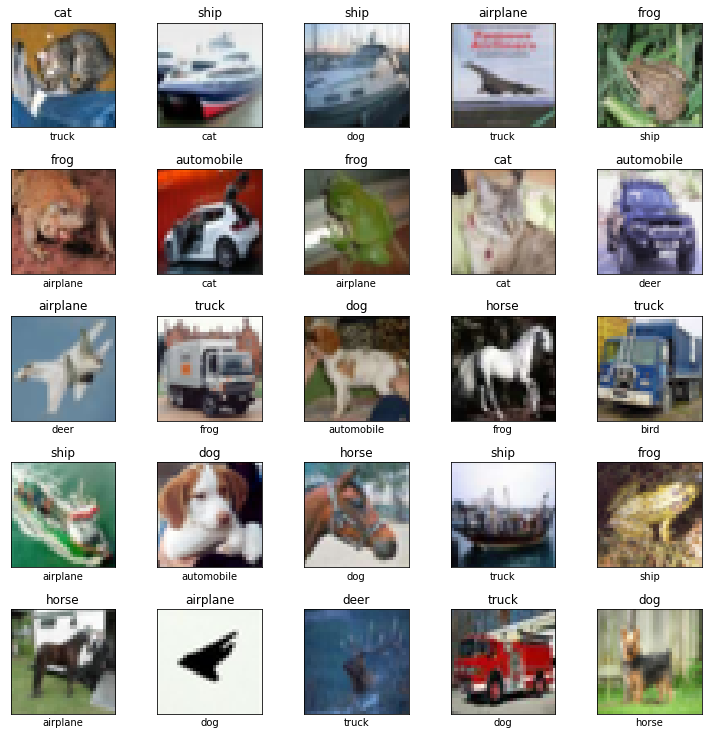

In [58]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_A[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetB :
* title - truth
* label - prediction 

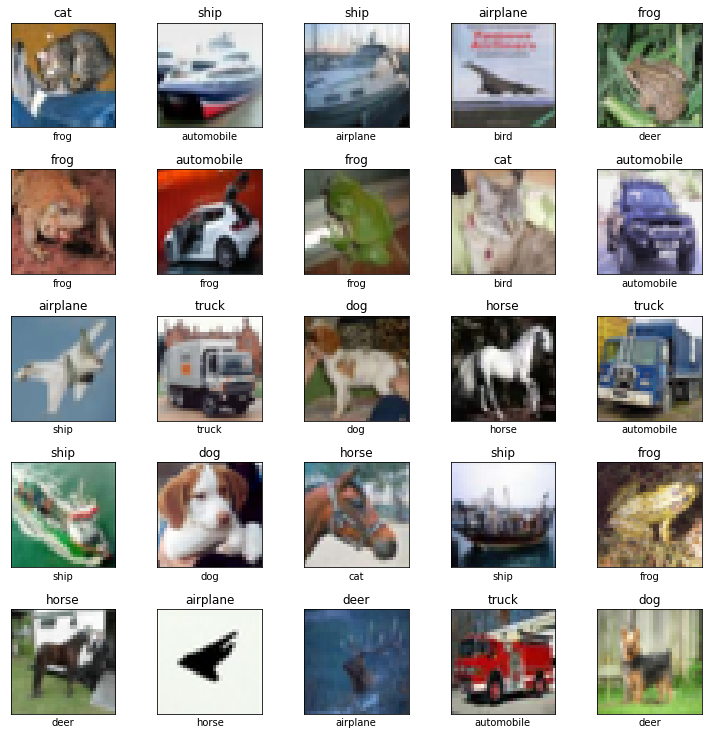

In [59]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_B[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Plots for NetC :
* title - truth
* label - prediction 

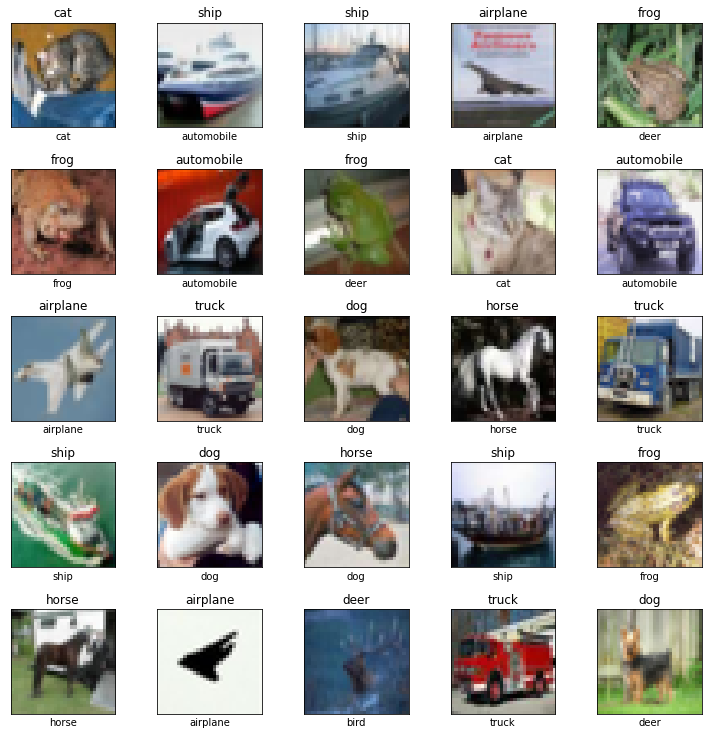

In [60]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetA")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_C[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Plot for NetD:


*   title - truth
*   label - prediction



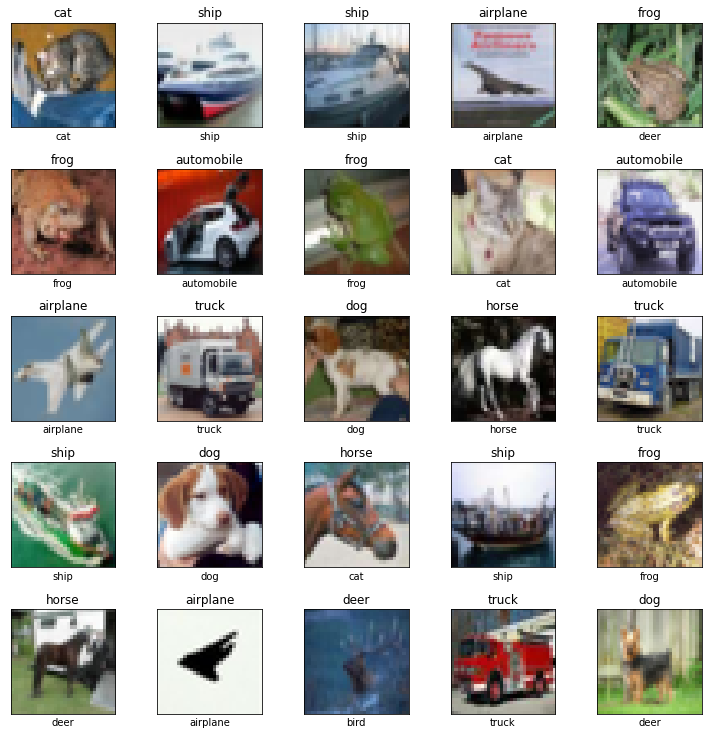

In [61]:
plt.figure(figsize=(12,12))
plt.title("Plot for NetD")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.title(classes[test_labels[i]])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_D[i]])
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Visualization and Accuracy :

<Figure size 432x288 with 0 Axes>

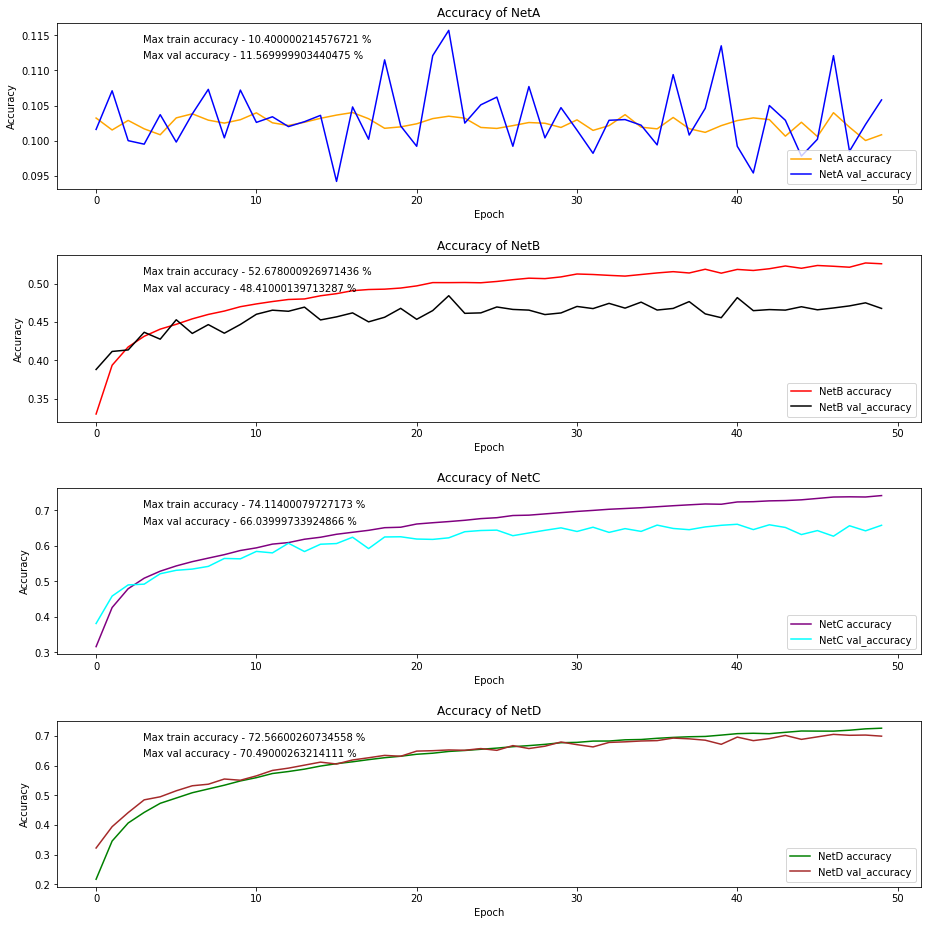

Test accuracy of NetA-  10.580000281333923 %
Test accuracy of NetB-  46.75000011920929 %
Test accuracy of NetC-  65.75000286102295 %
Test accuracy of NetD-  69.88999843597412 %


In [62]:
maxA=sorted(hisA.history['accuracy'],reverse=True)
acrA=str(maxA[0]*100)
maxB=sorted(hisB.history['accuracy'],reverse=True)
acrB=str(maxB[0]*100)
maxC=sorted(hisC.history['accuracy'],reverse=True)
acrC=str(maxC[0]*100)
maxD=sorted(hisD.history['accuracy'],reverse=True)
acrD=str(maxD[0]*100)
maxE=sorted(hisE.history['accuracy'],reverse=True)
acrE=str(maxE[0]*100)
maxAV=sorted(hisA.history['val_accuracy'],reverse=True)
acrAV=str(maxAV[0]*100)
maxBV=sorted(hisB.history['val_accuracy'],reverse=True)
acrBV=str(maxBV[0]*100)
maxCV=sorted(hisC.history['val_accuracy'],reverse=True)
acrCV=str(maxCV[0]*100)
maxDV=sorted(hisD.history['val_accuracy'],reverse=True)
acrDV=str(maxDV[0]*100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig, axs = plt.subplots(4, 1,figsize=(15,15))
axs[0].set_title("Accuracy of NetA")
axs[0].plot(hisA.history['accuracy'], label='NetA accuracy',color='orange')
axs[0].plot(hisA.history['val_accuracy'], label = 'NetA val_accuracy',color='blue')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].text(0.1,0.9,'Max train accuracy - '+acrA+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[0].text(0.1,0.8,'Max val accuracy - '+acrAV+' %', verticalalignment='center', transform=axs[0].transAxes)
axs[1].set_title("Accuracy of NetB")
axs[1].plot(hisB.history['accuracy'], label='NetB accuracy',color='red')
axs[1].plot(hisB.history['val_accuracy'], label = 'NetB val_accuracy',color='black')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')
axs[1].text(0.1,0.9,'Max train accuracy - '+acrB+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[1].text(0.1,0.8,'Max val accuracy - '+acrBV+' %', verticalalignment='center', transform=axs[1].transAxes)
axs[2].set_title("Accuracy of NetC")
axs[2].plot(hisC.history['accuracy'], label='NetC accuracy',color='purple')
axs[2].plot(hisC.history['val_accuracy'], label = 'NetC val_accuracy',color='cyan')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Accuracy')
axs[2].legend(loc='lower right')
axs[2].text(0.1,0.9,'Max train accuracy - '+acrC+' %', verticalalignment='center', transform=axs[2].transAxes)
axs[2].text(0.1,0.8,'Max val accuracy - '+acrCV+' %', verticalalignment='center', transform=axs[2].transAxes)
axs[3].set_title("Accuracy of NetD")
axs[3].plot(hisD.history['accuracy'], label='NetD accuracy',color='green')
axs[3].plot(hisD.history['val_accuracy'], label = 'NetD val_accuracy',color='brown')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Accuracy')
axs[3].legend(loc='lower right')
axs[3].text(0.1,0.9,'Max train accuracy - '+acrD+' %', verticalalignment='center', transform=axs[3].transAxes)
axs[3].text(0.1,0.8,'Max val accuracy - '+acrDV+' %', verticalalignment='center', transform=axs[3].transAxes)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)   
plt.show()
print("Test accuracy of NetA- ",aacA[1]*100,"%")
print("Test accuracy of NetB- ",accB[1]*100,"%")
print("Test accuracy of NetC- ",accC[1]*100,"%")
print("Test accuracy of NetD- ",accD[1]*100,"%")